Dataset ImageFolder
    Number of datapoints: 999
    Root location: /kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original
    StandardTransform
Transform: Compose(
               Resize(size=(180, 180), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
DATA
tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          .

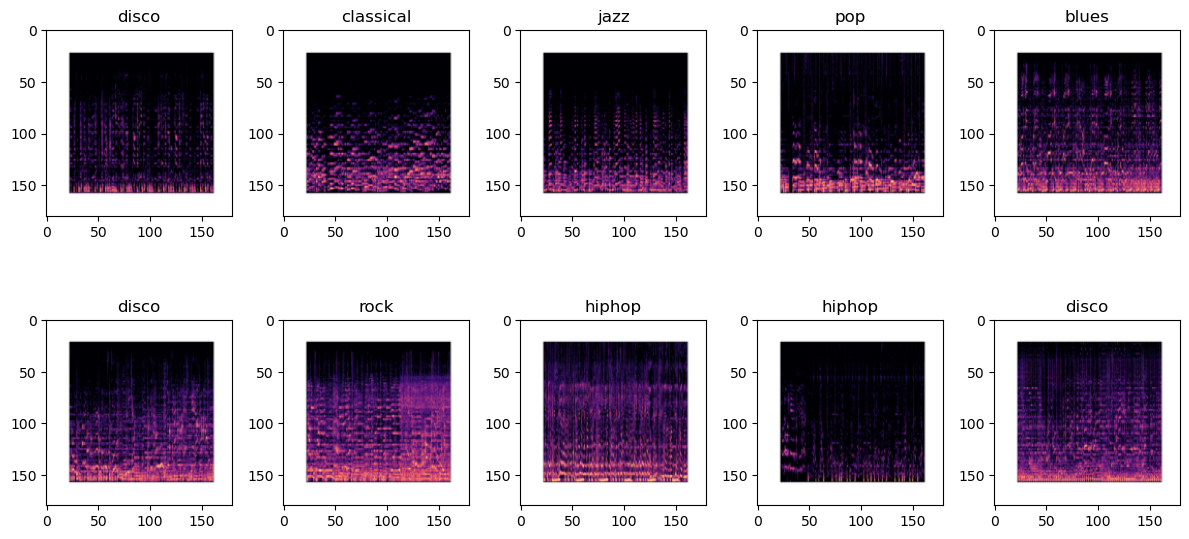

NameError: name 'batch_size' is not defined

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.datasets as datasets
import os

transform = transforms.Compose([
    transforms.Resize((180, 180)),  # resize the input images to 180x180
    transforms.ToTensor(),   # convert the images to PyTorch tensors
])
      
dataset = datasets.ImageFolder(root='/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original', transform=transform)
print(dataset)
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

for i,img in enumerate(dataloader):
    print("DATA")
    print(img[0])
    print("------------------------")
    print(img[1])
    print("SHAPE")
    print(i)
    break

# Iterate through the dataset and plot some images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (images, labels) in enumerate(dataloader):
    if i == 0:
        for j in range(10):
            ax = axs[j // 5, j % 5]
            ax.imshow(images[j].permute(1, 2, 0))
            ax.set_title(classes[labels[j]])
        plt.tight_layout()
        plt.show()
        break
        
        
#split the dataset into training, validation, and test datasets
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])
#Create dataloaders for the three datasets
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=True)

In [ ]:
class Net1(nn.Module):
    def __init__(self, hidden_size1, hidden_size2, num_classes):
        super(Net1, self).__init__()
        
        
        self.fc1 = nn.Linear(97200, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        
        self.fc1weights=nn.Parameter(torch.randn(97200,requires_grad=True,dtype=torch.float32))
        
        self.fc1bias=nn.Parameter(torch.tensor(0.,requires_grad=True,dtype=torch.float32))
    
    
    
    def forward(self, x):

        x = x.flatten(start_dim=1) #flatten input
        
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    



In [ ]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding = 2)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding = 2)
        self.relu2 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=(12,12))
        self.conv3 = nn.Conv2d(64, 64, kernel_size=5, padding = 2)
        self.relu3 = nn.ReLU(inplace=True)
        self.conv4 = nn.Conv2d(64, 32, kernel_size=5, padding = 2)
        self.relu4 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=(12,12))
        self.fc1 = nn.Linear(32, 256)
        #self.fc1 = nn.Linear(256 * 48 * 48, 256)
        #self.fc1 = nn.Linear(256 * 24 * 24, 256)
        #self.fc1 = nn.Linear(13212000, 256)

        self.relu5 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        #x = x.view(-1, 256 * 24 * 24)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x

In [ ]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, padding = 2)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, padding = 2)
        self.bn2 = nn.BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True)
        self.relu2 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=(4,4))
        self.conv3 = nn.Conv2d(64, 64, kernel_size=5, padding = 2)
        self.bn3 = nn.BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True)
        self.relu3 = nn.ReLU(inplace=True)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=5, padding = 2)
        self.bn4 = nn.BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True)
        self.relu4 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=(4,4))
        self.fc1 = nn.Linear(in_features=576,out_features= 256)
        self.bn5 = nn.BatchNorm1d(256, eps=1e-05, momentum=0.9, affine=True)
        self.relu5 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)  # BatchNorm after conv1
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)  # BatchNorm after conv2
        x = self.relu2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.bn3(x)  # BatchNorm after conv3
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.bn4(x)  # BatchNorm after conv4
        x = self.relu4(x)
                
            

        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn5(x)  # BatchNorm after fc1
        x = self.relu5(x)
        x = self.fc2(x)
        return x
    
        


In [ ]:

def get_accuracy(dataloader, model, device):
    with torch.no_grad():
        total=len(dataloader.dataset)
        correct=0
        train_loss = 0
        for imgs,labels in dataloader:
            imgs=imgs.to(device)
            labels=labels.to(device)
            outputs=model(imgs)
            
            loss=loss_fn(outputs,labels)
            train_loss += loss.item()
            
          # the second return value is the index of the max i.e. argmax
            _,predicted=torch.max(outputs.data,1)
            correct+=(predicted==labels).sum()
        
 
        train_loss /= total
       
    
        accuracy = ((correct/total).item())
        train_loss = (train_loss)
        return accuracy, train_loss
    


def evaluate(loader,model):
    total=0.
    for imgs,labels in loader:
        imgs=imgs.cuda()
        labels=labels.cuda()
        outputs=model(imgs)
        _,pred=torch.max(outputs,dim=1)
        total+=(pred==labels).sum()
    return total.item(),(total/len(loader.dataset)).item()


class EarlyStopping():
    def __init__(self,patience=6,tolerance=0):
        self.patience=patience
        self.tolerance=tolerance
        self.min_loss=float('inf')
        self.count=0
    def __call__(self,loss):
        if loss<self.min_loss:
            self.count=0
            self.min_loss=loss
            return False
        elif loss>self.min_loss+self.tolerance:
            self.count+=1
            if self.count>self.patience:
                return True
        return False

In [ ]:
# import torchvision
from torchvision.transforms import RandomHorizontalFlip,RandomCrop,RandomRotation


seed=97531
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic=True



loss_fn = nn.CrossEntropyLoss()
#model = Net1(50,100,10)
model = Net3()
#optimizer = optim.RMSprop(model.parameters(), lr=0.05, alpha = 0.1, momentum = 0)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.05, alpha=0.9, eps=1e-2, momentum = 0.6)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
device = torch.device('cpu')

# Move the model and data to the device
model.to(device)

num_epochs = 100

import torchvision.transforms.functional as TF
import random


def random_rotate_batch(batch):
    rotated_batch = []
    degrees = 50 #30
    for image in batch:
        angle = random.uniform(-degrees, degrees)  # randomly sample a float angle between -degrees and degrees
        rotated_image = TF.rotate(image, angle)
        rotated_batch.append(rotated_image)
    return torch.stack(rotated_batch)



epochs=100
trigger=True
es=EarlyStopping()
model.train()

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.75, patience=4)


for epoch in range(epochs):
    epoch_loss=0.
    for imgs,labels in train_dataloader:
        optimizer.zero_grad()
        imgs=imgs.to(device)
           
        imgs = random_rotate_batch(imgs)
        
        
        labels=labels.to(device)
        outputs=model(imgs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        epoch_loss=0.9*epoch_loss+0.1*loss.item()

    t_acc, t_loss =get_accuracy(train_dataloader,model,device) 
    v_acc, v_loss=get_accuracy(val_dataloader,model,device)
    scheduler.step(v_loss)
        
    if es(v_loss) and trigger:
        #   break
        print("At epoch={} we should stop. Validation accuracy={}".format(epoch,v_acc))
        es.count = 0

        #trigger=False
    print("LR: ", optimizer.param_groups[0]['lr'])
    print("Epoch: ", epoch, ", Train acc: ", t_acc, ", Train loss: ", t_loss, ", Val acc: ", v_acc, ", Val loss: ", v_loss)


In [ ]:
plt.plot(range(1, 101), train_acc, label='Train')
plt.plot(range(1, 101), val_acc, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

print("model test accuracy: ", get_accuracy(test_dataloader, model, device)[0])

print("model test loss: ", get_accuracy(test_dataloader, model, device)[1])


In [ ]:
try:
    from torchmetrics import ConfusionMatrix
except: 
    !pip install torchmetrics
    from torchmetrics import ConfusionMatrix

conmat=ConfusionMatrix(task='multiclass',num_classes=10)
conmat=conmat.to(device)

In [ ]:
total=0
correct=0
for i, (imgs, labels) in enumerate(test_dataloader):
  
    imgs=imgs.to(device)
    labels=labels.to(device)
    outputs=model(imgs)
    # the second return value is the index of the max i.e. argmax
    _,predicted=torch.max(outputs.data,1)
    correct+=(predicted==labels).sum()
    total+=labels.size()[0]
    conmat.update(predicted,labels)
    



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
x=conmat.compute().cpu().numpy()

plt.figure(figsize=(10,7))
sb.heatmap(x,xticklabels=classes,yticklabels=classes,annot=True,fmt=".0f")